### **Google drive helper to load data**



<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://drive.google.com/open?id=1Ys1UOUaoezhVQyPmOODRObxPqZp0ijry"><img src="https://sites.google.com/a/bhuhsd.net/jessica-rapetti-u-s-government-economics-eportfolio-bhhs2014/_/rsrc/1421979558598/s6-unit-2-the-goals-and-the-origins-of-our-government-1/home/google%20drive.png?height=30&width=50" /> Dataset link</a>
  </td>
</table>


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip -q "/content/drive/My Drive/Multi_Label_dataset.zip"



---




In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import PIL
%matplotlib inline

Using TensorFlow backend.


In [4]:
train = pd.read_csv("Multi_Label_dataset/train.csv")  
train.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7254 entries, 0 to 7253
Data columns (total 27 columns):
Id             7254 non-null object
Genre          7254 non-null object
Action         7254 non-null int64
Adventure      7254 non-null int64
Animation      7254 non-null int64
Biography      7254 non-null int64
Comedy         7254 non-null int64
Crime          7254 non-null int64
Documentary    7254 non-null int64
Drama          7254 non-null int64
Family         7254 non-null int64
Fantasy        7254 non-null int64
History        7254 non-null int64
Horror         7254 non-null int64
Music          7254 non-null int64
Musical        7254 non-null int64
Mystery        7254 non-null int64
N/A            7254 non-null int64
News           7254 non-null int64
Reality-TV     7254 non-null int64
Romance        7254 non-null int64
Sci-Fi         7254 non-null int64
Short          7254 non-null int64
Sport          7254 non-null int64
Thriller       7254 non-null int64
War            7

## Data Preparation


*   Loading the images with id
*   Normalize the data
*   Construct train and test set


In [6]:
img_w = 224
img_h = 224
img_c = 3
train_image = []

for i in tqdm(range(len(train))):
    img = image.load_img('Multi_Label_dataset/Images/'+train['Id'][i]+'.jpg', target_size=(img_w, img_h, img_c))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 7254/7254 [00:26<00:00, 273.56it/s]


In [47]:
X.shape

(7254, 224, 224, 3)

In [48]:
y = np.array(train.drop(['Id', 'Genre'],axis=1))
y.shape

(7254, 25)

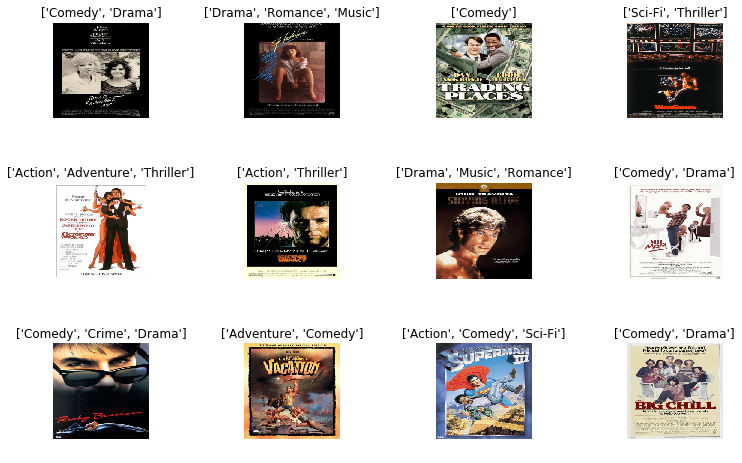

In [8]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.4, wspace=1)

rows = 3
cols = 4

for i in range(0,12):
  fig.add_subplot(rows, cols, i+1)
  plt.title(train['Genre'][i])
  plt.axis('off')
  plt.imshow(X[i])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

## Model Building and Training


### Note*


> In case of multi-label classification, last layer activation is sigmoid and binary cross-entropy is used for the loss function.





In [11]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(img_w,img_h,img_c)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

W0812 12:24:10.830030 139676154849152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0812 12:24:10.902150 139676154849152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0812 12:24:10.912278 139676154849152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0812 12:24:10.966883 139676154849152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0812 12:24:10.970622 139676154849152 deprecation_wrapp

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 220, 220, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 106, 106, 32)      12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 49, 49, 64)        51264     
__________

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

W0812 12:24:52.256679 139676154849152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0812 12:24:52.287948 139676154849152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0812 12:24:52.294497 139676154849152 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Train on 5803 samples, validate on 1451 samples
Epoch 1/10
5803/5803 [==============================] - 317s 55ms/step - loss: 0.4056 - acc: 0.8299 - val_loss: 0.2809 - val_acc: 0.9052
Epoch 2/10
5803/5803 [==============================] - 310s 53ms/step - loss: 0.2865 - acc: 0.9021 - val_loss: 0.2594 - val_acc: 0.9052
Epoch 3/10
5803/5803 [==============================] - 310s 53ms/step - loss: 0.2711 - acc: 0.9044 - val_loss: 0.2514 - val_acc: 0.9052
Epoch 4/10
5803/5803 [==============================] - 311s 54ms/step - loss: 0.2631 - acc: 0.9061 - val_loss: 0.2461 - val_acc: 0.9052
Epoch 5/10
5803/5803 [==============================] - 311s 54ms/step - loss: 0.2587 - acc: 0.9063 - val_loss: 0.2486 - val_acc: 0.9052
Epoch 6/10
5803/5803 [==============================] - 311s 54ms/step - loss: 0.2556 - acc: 0.9071 - val_loss: 0.2445 - val_acc: 0.9055
Epoch 7/10
5803/5803 [==============================] - 311s 54ms/step - loss: 0.2541 - acc: 0.9071 - val_loss: 0.2449 - val_acc: 

## Get Predictions


*   Prepare the image
*   Call predict Function



In [0]:
def predict_genre(img):
  classes = np.array(train.columns[2:])
  proba = model.predict(img.reshape(1,img_w, img_h, img_c))
  top_3 = np.argsort(proba[0])[:-4:-1]
  for i in range(3):
      print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
  plt.imshow(img)

Drama (0.496)
Comedy (0.332)
Action (0.251)


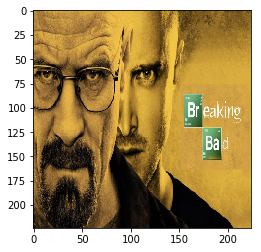

In [42]:
img = image.load_img('bryan-cranston-breaking-bad-movie-dan-patrick.jpg',target_size=(img_w, img_h, img_c))
img = image.img_to_array(img)
img = img/255

predict_genre(img)

In [43]:
!wget https://i.pinimg.com/originals/0c/35/6c/0c356c40c29f3b8e69eeb5c918a6eef7.jpg

--2019-08-12 13:59:43--  https://i.pinimg.com/originals/0c/35/6c/0c356c40c29f3b8e69eeb5c918a6eef7.jpg
Resolving i.pinimg.com (i.pinimg.com)... 104.18.15.176, 104.18.14.176, 2a04:4e42:3b::84
Connecting to i.pinimg.com (i.pinimg.com)|104.18.15.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 455919 (445K) [image/jpeg]
Saving to: ‘0c356c40c29f3b8e69eeb5c918a6eef7.jpg’

0c356c40c29f3b8e69e 100%[===================>] 445.23K  --.-KB/s    in 0.04s   

2019-08-12 13:59:43 (11.8 MB/s) - ‘0c356c40c29f3b8e69eeb5c918a6eef7.jpg’ saved [455919/455919]



Drama (0.501)
Action (0.27)
Comedy (0.26)


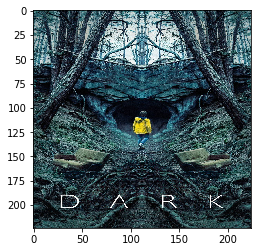

In [44]:
img = image.load_img('0c356c40c29f3b8e69eeb5c918a6eef7.jpg',target_size=(img_w, img_h, img_c))
img = image.img_to_array(img)
img = img/255

predict_genre(img)

In [45]:
!wget http://static.tvgcdn.net/feed/1/468/118436468.jpg

--2019-08-12 14:07:29--  http://static.tvgcdn.net/feed/1/468/118436468.jpg
Resolving static.tvgcdn.net (static.tvgcdn.net)... 23.45.145.104, 2600:1407:2800:391::16ab, 2600:1407:2800:390::16ab
Connecting to static.tvgcdn.net (static.tvgcdn.net)|23.45.145.104|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3314433 (3.2M) [image/jpeg]
Saving to: ‘118436468.jpg’

118436468.jpg       100%[===================>]   3.16M  20.7MB/s    in 0.2s    

2019-08-12 14:07:29 (20.7 MB/s) - ‘118436468.jpg’ saved [3314433/3314433]



Drama (0.501)
Action (0.279)
Thriller (0.238)


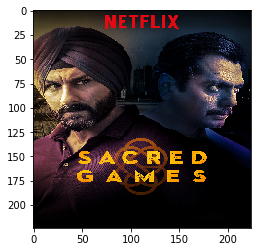

In [46]:
img = image.load_img('118436468.jpg',target_size=(img_w, img_h, img_c))
img = image.img_to_array(img)
img = img/255

predict_genre(img)